# Fetch Data

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from fredapi import Fred
import requests

ticker_symbols = ["CL=F","^GSPC", "NYA", "XOI", "VIX"]
start_date = "2010-01-01"
end_date = "2023-12-31"
data = yf.download(ticker_symbols, start=start_date, end=end_date)
# data.describe().applymap('{:.2f}'.format)
!pip install fredapi
# Download Treasury bonds rate 10 year data

api_key = 'bcf7b79cc0884c8c9761641d644fb207'
fred = Fred(api_key=api_key)
DGS10 = fred.get_series('DGS10', start_date=start_date, end_date=end_date)
DTWEXM = fred.get_series('DTWEXM', start_date=start_date, end_date=end_date)
#LIBOR = fred.get_series('LIOR3M', start_date=start_date, end_date=end_date)

# EIA API key
api_key = "T3jho0OOfhOARzJZKXVfdrUFGnWi3PTBLpb4rWBj"
# URL for the API request (that i got from querying eia database on their website)
url = f'https://api.eia.gov/v2/petroleum/pri/spt/data/?api_key={api_key}&frequency=daily&data[0]=value&facets[series][]=RWTC&facets[product][]=EPCWTI&facets[process][]=PF4&start=2010-01-01&sort[0][column]=period&sort[0][direction]=asc&offset=0&length=5000'

# Send the HTTP request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Load the response JSON into a DataFrame
    wti_data = pd.DataFrame(response.json()['response']['data'])
    WTI_SPOT = wti_data.loc[:,['period', 'value']]
    #WTI_SPOT = pd.Series(WTI_SPOT['value'].values, index = WTI_SPOT['period'].values, dtype='float')
    #WTI_SPOT.index = pd.to_datetime(WTI_SPOT.index)
else:
    print('Failed to retrieve data:', response.status_code, response.text)


[*********************100%%**********************]  5 of 5 completed


# Data Processing

In [ ]:
data.columns = ["_".join(col).replace(" ", "") for col in data.columns.to_flat_index()]

for ticker in ticker_symbols:
  data['Change_'+ticker] = data['Close_'+ticker] - data['Open_'+ticker]
  data['Range_'+ticker] = data['High_'+ticker] - data['Low_'+ticker]

data.rename_axis(None, axis =1, inplace=True)
data['DGS10'] = DGS10
data['DTWEXM'] = DTWEXM
#data['WTI_SPOT'] = WTI_SPOT
data.drop([col for col in data.columns  if col.split('_')[0] in ['Close', 'High', 'Low']], axis=1,inplace=True)

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
data.head()

,AdjClose_CL=F,AdjClose_NYA,AdjClose_VIX,AdjClose_XOI,AdjClose_^GSPC,Open_CL=F,Open_NYA,Open_VIX,Open_XOI,Open_^GSPC,...,Change_^GSPC,Range_^GSPC,Change_NYA,Range_NYA,Change_XOI,Range_XOI,Change_VIX,Range_VIX,DGS10,DTWEXM
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,81.5100,7326.7402,NaN,1100.5100,1132.9900,79.6300,7184.9800,NaN,1068.2100,1116.5601,...,16.4299,17.3099,141.7603,146.1401,32.3000,33.0300,NaN,NaN,3.8500,73.6127
2010-01-05,81.7700,7354.8701,NaN,1106.9800,1136.5200,81.6300,7326.7402,NaN,1100.5100,1132.6600,...,3.8600,6.9700,28.1299,45.8599,6.4700,10.1801,NaN,NaN,3.7700,73.5325
2010-01-06,83.1800,7377.7002,NaN,1113.4301,1137.1400,81.4300,7354.8501,NaN,1106.9800,1135.7100,...,1.4301,5.2400,22.8501,46.7896,6.4501,13.6899,NaN,NaN,3.8500,73.5662
2010-01-07,82.6600,7393.9302,NaN,1112.5300,1141.6899,83.2000,7377.7002,NaN,1113.4301,1136.2700,...,5.4199,11.1400,16.2300,72.7002,-0.9000,11.9099,NaN,NaN,3.8500,73.9495
2010-01-08,82.7500,7425.3501,NaN,1116.1899,1144.9800,82.6500,7393.9302,NaN,1112.5300,1140.5200,...,4.4600,9.1700,31.4199,58.6001,3.6599,12.4800,NaN,NaN,3.8300,73.7168


In [ ]:
data.isna().sum(axis=0).sort_values().T

AdjClose_^GSPC       1
Range_^GSPC          1
Change_^GSPC         1
Open_^GSPC           1
Volume_^GSPC         1
AdjClose_CL=F        2
Open_CL=F            2
Volume_CL=F          2
Range_CL=F           2
Change_CL=F          2
DGS10               27
AdjClose_NYA       720
Range_NYA          720
Change_NYA         720
Open_NYA           720
Volume_NYA         720
DTWEXM            1049
Open_XOI          1159
AdjClose_XOI      1159
Change_XOI        1159
Range_XOI         1159
Volume_XOI        1159
Open_VIX          2736
AdjClose_VIX      2736
Change_VIX        2736
Range_VIX         2736
Volume_VIX        2736
dtype: int64

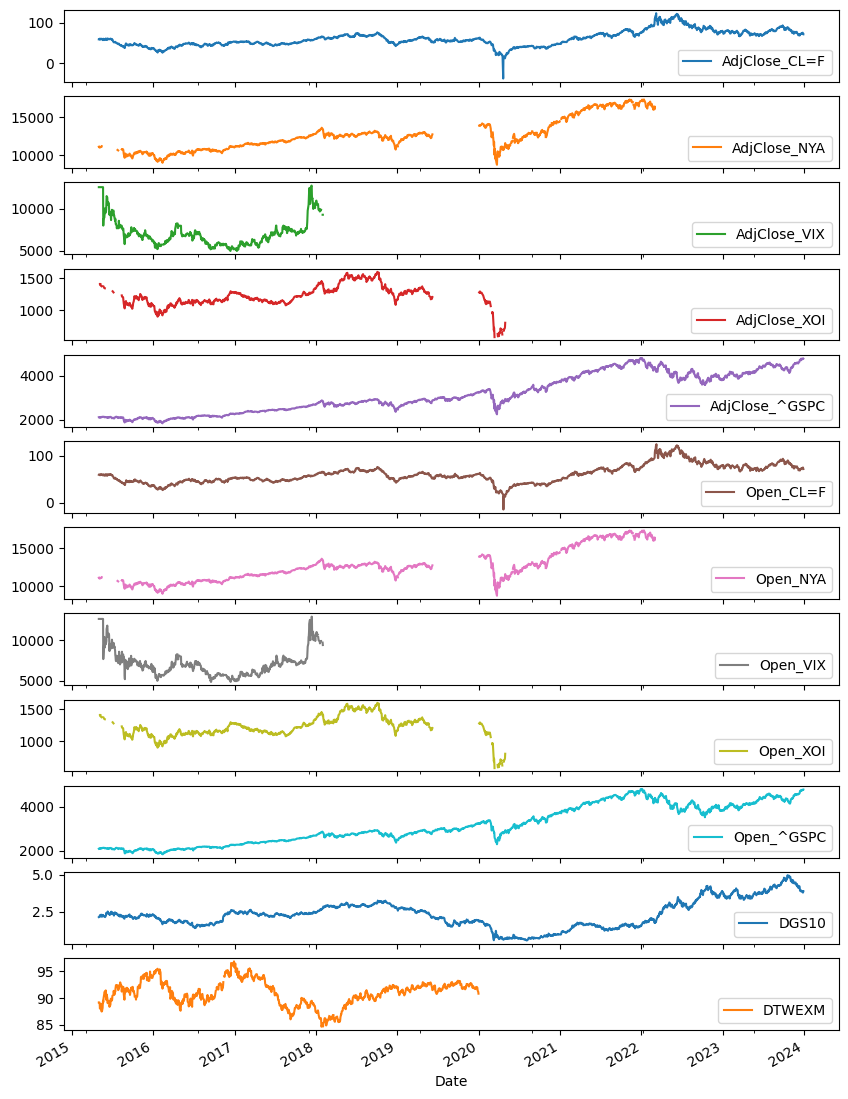

In [ ]:
import matplotlib.pyplot as plt

axarr = data.loc['2015-05':, price_series].plot(subplots=True, layout=(len(price_series),1), figsize=(10, 15), legend=True)
# Place legend at bottom right
for ax in axarr.flatten():
    ax.legend(loc='lower right')

plt.show()

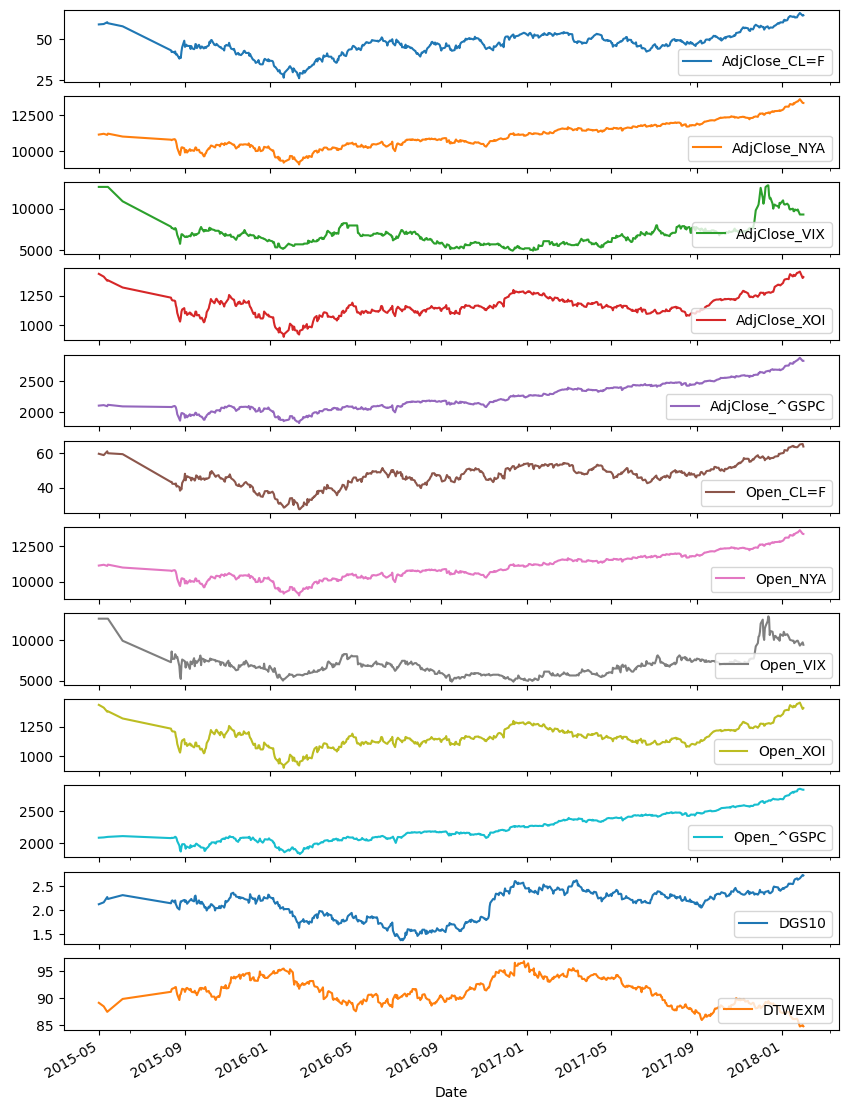

In [ ]:
all_data = data.copy()

data.dropna(inplace=True)
data.drop(['Volume_XOI', 'Change_NYA',	'Range_NYA', 'Change_XOI',	'Range_XOI'], axis=1, inplace=True)
axarr = data.loc['2015-05':, price_series].plot(subplots=True, layout=(len(price_series),1), figsize=(10, 15), legend=True)
# Place legend at bottom right
for ax in axarr.flatten():
    ax.legend(loc='lower right')

plt.show()

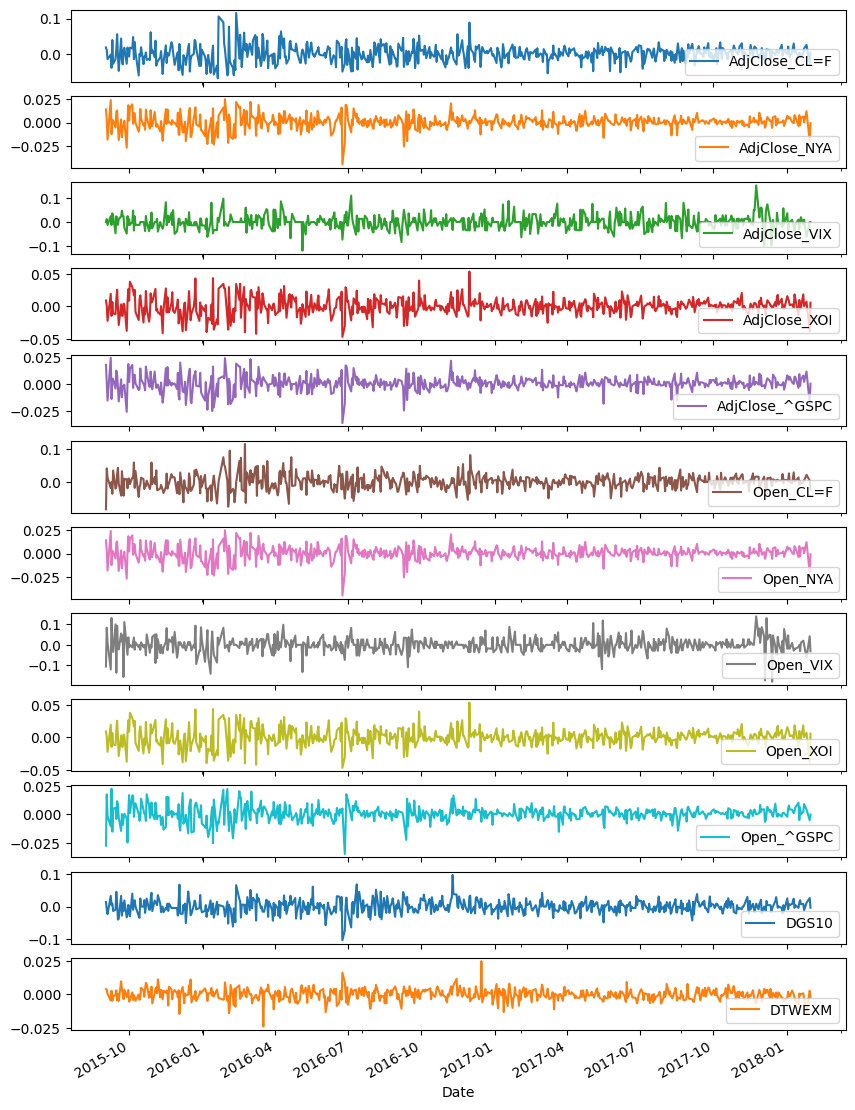

In [ ]:
rets_plus_features = data.loc[:, price_series].apply(lambda x:np.log(x)).diff(1).dropna()
axarr = rets_plus_features.plot(subplots=True, layout=(len(price_series),1), figsize=(10, 15), legend=True)
# Place legend at bottom right
for ax in axarr.flatten():
    ax.legend(loc='lower right')

plt.show()

In [ ]:
rets_plus_features.describe()

,AdjClose_CL=F,AdjClose_NYA,AdjClose_VIX,AdjClose_XOI,AdjClose_^GSPC,Open_CL=F,Open_NYA,Open_VIX,Open_XOI,Open_^GSPC,DGS10,DTWEXM
count,591.0000,591.0000,591.0000,591.0000,591.0000,591.0000,591.0000,591.0000,591.0000,591.0000,591.0000,591.0000
mean,0.0006,0.0005,0.0006,0.0004,0.0007,0.0005,0.0005,0.0004,0.0004,0.0006,0.0004,-0.0001
std,0.0240,0.0074,0.0299,0.0135,0.0071,0.0238,0.0074,0.0378,0.0135,0.0067,0.0206,0.0043
min,-0.0695,-0.0440,-0.1206,-0.0468,-0.0366,-0.0832,-0.0440,-0.1807,-0.0468,-0.0350,-0.1028,-0.0240
25%,-0.0131,-0.0027,-0.0148,-0.0064,-0.0021,-0.0129,-0.0027,-0.0165,-0.0064,-0.0023,-0.0123,-0.0025
50%,0.0021,0.0006,0.0000,0.0003,0.0005,0.0002,0.0006,0.0000,0.0003,0.0009,0.0000,-0.0000
75%,0.0134,0.0039,0.0152,0.0072,0.0042,0.0132,0.0039,0.0168,0.0072,0.0038,0.0132,0.0027
max,0.1162,0.0247,0.1542,0.0533,0.0248,0.1149,0.0247,0.1398,0.0533,0.0226,0.0963,0.0249


# Predictive Modeling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def forecast_ahead(data, target_col=0, days_ahead=1, window_size = 5, epochs = 200, num_units = 15,  dropout_rate = .5, batch_size = 100):


        # Normalize the data, fix the code to account for the target column position
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data)
        input_data = scaled_data[:-window_size, 1:]
        targets = scaled_data[window_size:, 0]


        # Split the data and targets into training and testing sets
        split = int(0.8 * len(data))
        train_data, train_targets = input_data[:split], targets[:split]
        test_data, test_targets = input_data[split:], targets[split:]


        # Create a time series dataset from array for training
        train_dataset = timeseries_dataset_from_array(
            data=train_data,
            targets=train_targets,
            sequence_length=window_size,
            sequence_stride=1,
            batch_size=batch_size
        )

        # Create a time series dataset from array for testing
        test_dataset = timeseries_dataset_from_array(
            data=test_data,
            targets=test_targets,
            sequence_length=window_size,
            sequence_stride=1,
            batch_size=batch_size
        )

        model = Sequential()
        model.add(LSTM(num_units, input_shape=(window_size, scaled_data.shape[1]-1)))
        model.add(Dropout(dropout_rate))
        model.add(Dense(scaled_data.shape[1]))
        model.compile(optimizer='adam', loss='mse')

        # Fit the model to the training data
        model.fit(train_dataset, epochs=epochs, verbose=0, callbacks=[EarlyStopping(patience=10)])

        # Predict on the training data
        train_preds = model.predict(train_dataset)
        test_preds = model.predict(test_dataset)
        # Inverse transform train_preds
        train_preds_original_scale = scaler.inverse_transform(train_preds)
        test_preds_original_scale = scaler.inverse_transform(test_preds)

        # Compute the RMSE on the training set/ data.iloc[:-13,0] is subseted to account for 7 obs removed to setup the training set + a bacth of 6 leftout obs/ remove further 29 leftout obs after the train/test split
        train_rmse = np.sqrt(mean_squared_error(data.iloc[window_size:(split+1),0].values, train_preds_original_scale[:, 0]))

        return train_preds_original_scale[:, 0], test_preds_original_scale[:, 0]

In [ ]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

preds = np.zeros(5)

for h in range(1,6):
  _, xh = forecast_ahead(rets_plus_features, days_ahead=h)
  preds[h-1] = xh[-1]

2/2 [==============================] - 0s 6ms/step


# Diagnostics

In [ ]:
test_rmse = np.sqrt(mean_squared_error(preds, actual))
test_mae = mean_absolute_error(preds, actual)
test_r2 = r2_score(preds, actual)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
#print("Test R2 score:", test_r2)

Test RMSE: 0.016824940764986862
Test MAE: 0.01616622005941313


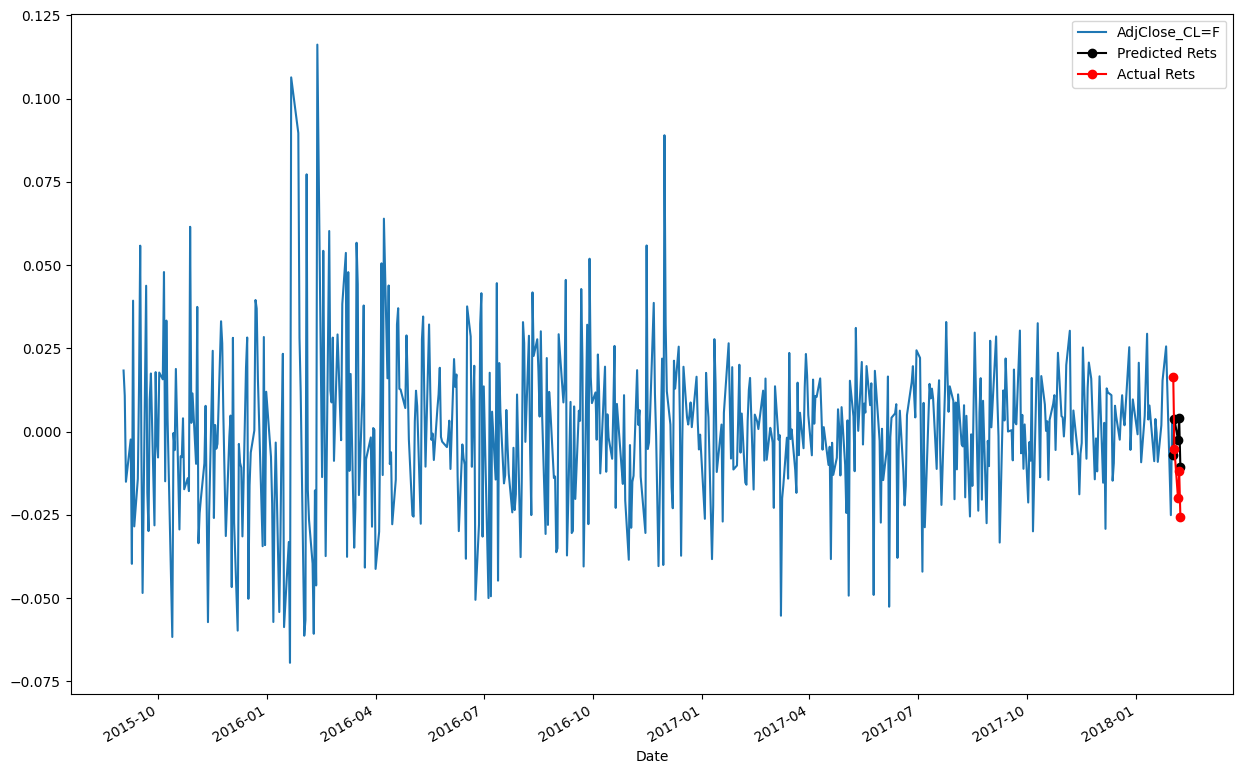

In [ ]:
start_date = data.index[-1] + pd.DateOffset(days=1)
end_date = start_date + pd.DateOffset(days=4)
actual = all_data['AdjClose_CL=F'].apply(lambda x:np.log(x)).diff(1).dropna().loc[start_date:end_date + pd.DateOffset(days=2)]
dates = actual.index
ax = rets_plus_features.iloc[:,0].plot(figsize=(15,10))
ax.plot(dates, preds, label='Predicted Rets', color='black', marker='o')
ax.plot(dates,
        actual,
        label='Actual Rets',
        color='red', marker='o')
ax.legend()
plt.show()

In [ ]:
start_date = data.index[-1] + pd.DateOffset(days=1)
end_date = start_date + pd.DateOffset(days=6)
dates = all_data[start_date:end_date].index
actual_prices = all_data.loc[dates, 'AdjClose_CL=F']
pred_prices = np.exp(preds)*(actual_prices)

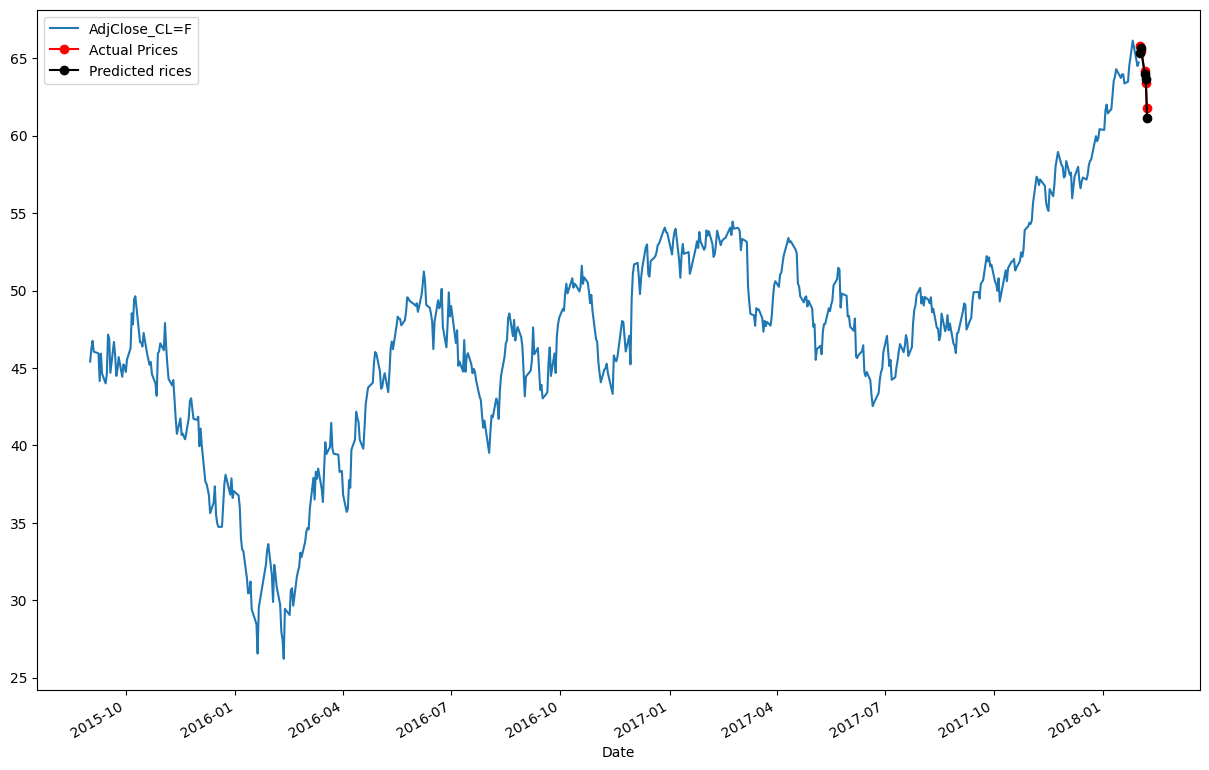

In [ ]:
ax = data['AdjClose_CL=F'].plot(figsize=(15,10))
ax.plot(dates, actual_prices.values, label='Actual Prices', color='red', marker='o')
ax.plot(dates, pred_prices.values, label='Predicted rices', color='black', marker='o')

ax.legend()
plt.show()